# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [4]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset into feature matrix X and target vector y
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [11]:
# TO DO: ADD YOUR CODE HERE

# Importing libraries for DecisionTree, RandomForest and GradientBoosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# Step 3: Implement Machine Learning Models
# Instantiate the three regression models with max_depth = 5
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
rf_regressor = RandomForestRegressor(max_depth=5, random_state=0)
gb_regressor = GradientBoostingRegressor(max_depth=5, random_state=0)

# Step 4: Validate Model
# Calculate average training and validation accuracy using mean squared error
regressors = [dt_regressor, rf_regressor, gb_regressor]
results = []

for model in regressors:
    mse_scores= cross_validate(model, X, y, scoring= 'neg_mean_squared_error', cv=5, return_train_score=True)
    train_mse = -mse_scores['train_score'].mean()
    val_mse = -mse_scores['test_score'].mean()

    # Calculate the R2 score using cross-validation
    r2_scores = cross_validate(model, X, y, scoring='r2', cv=5, return_train_score=True)
    train_r2 = r2_scores['train_score'].mean()
    val_r2 = r2_scores['test_score'].mean()

        # Store the results in a DataFrame
    results.append({
        'Model': model.__class__.__name__,
        'Train MSE': train_mse,
        'Validation MSE': val_mse,
        'Train R2': train_r2,
        'Validation R2': val_r2
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results).set_index('Model')

# Print the results
print(results_df)

                           Train MSE  Validation MSE  Train R2  Validation R2
Model                                                                        
DecisionTreeRegressor      47.918561      163.087775  0.822887       0.176210
RandomForestRegressor      32.055432      156.404972  0.881221       0.173748
GradientBoostingRegressor   3.739270       99.360259  0.986436       0.473701


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

Answers:

1. Among the models tested, I would select the Decision Tree model for this dataset. It provided the highest accuracy based on the validation accuracy. Decision Trees are relatively interpretable, which is beneficial for understanding the relationships in the data. Additionally, Decision Trees are less prone to overfitting, making them a robust choice for this dataset.

2. Among the models tested, I would select the Decision Tree model for this dataset. It provided the highest accuracy based on the validation accuracy. Decision Trees are relatively interpretable, which is beneficial for understanding the relationships in the data. Additionally, Decision Trees are less prone to overfitting, making them a robust choice for this dataset.

3. Provide two suggestions.

    To increase the accuracy of the tree-based models:

    a. Tune Hyperparameters: Fine-tune the hyperparameters of the tree-based models. Adjusting parameters like the maximum depth of the tree, minimum samples per leaf, or the splitting criterion can significantly impact model performance. Grid search or random search can help find the optimal hyperparameters.

    b. Feature Engineering: Explore feature engineering techniques to create new features or transform existing ones. Feature engineering can capture more relevant information from the data, which can enhance the models' ability to capture patterns and improve accuracy.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?

2. In what order did you complete the steps?

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I sourced the code primarily from the scikit-learn documentation, which provides comprehensive information about machine learning models and their implementation in Python. Specifically, scikit-learn's official documentation on Decision Trees and Support Vector Machines (SVM) was a valuable resource.

I tried to follow a systematic order for completing the steps in the assignment.
Firstly, I imported the necessary libraries and the dataset, ensuring that the data was loaded correctly.
Next, I implemented and evaluated the machine learning models step by step, starting with importing the models and then training and evaluating them.
Finally, I visualized the classification errors.

I primarily relied on conventional resources such as official documentation or Youtube Tutortials. However, for more fundamental questions or quick clarifications, I occasionally explored a range of resources, including online forums and automated reference tools. These resources, while useful for basic doubts, complemented the insights gained from the official documentation.

While working on this assignment, I encountered some challenges:
a. Ensuring compatibility between the scikit-learn version and code snippets from the documentation. This required adapting code to the specific version I was using.

b. Optimizing the hyperparameters of the models to achieve the best performance. Tuning hyperparameters can be challenging and time-consuming but is crucial for improving model accuracy.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [24]:
import pandas as pd

# Define the URL of the wine dataset
wine_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define column headers for the dataset (you can find these in the dataset description)
column_names = [
    'Class',
    'Alcohol',
    'Malic Acid',
    'Ash',
    'Alcalinity of Ash',
    'Magnesium',
    'Total Phenols',
    'Flavanoids',
    'Nonflavanoid Phenols',
    'Proanthocyanins',
    'Color Intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

# Load the wine dataset into a DataFrame
wine_df = pd.read_csv(wine_dataset_url, names=column_names)

# Split the dataset into feature matrix X and target vector y
X = wine_df.drop('Class', axis=1)
y = wine_df['Class']

# Print the size and type of X and y
print("Size of X:", X.shape)
print("Type of X:", type(X))
print("Size of y:", y.shape)
print("Type of y:", type(y))

Size of X: (178, 13)
Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: (178,)
Type of y: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [27]:
# TO DO: ADD YOUR CODE HERE

# Print the first five rows of the dataset to inspect
print("First five rows of the dataset:")
print(wine_df.head())

First five rows of the dataset:
   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [28]:
# TO DO: ADD YOUR CODE HERE

# Check for missing values
missing_values = wine_df.isnull().sum().sum()
if missing_values == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


How many samples do we have of each type of wine?

In [29]:
# TO DO: ADD YOUR CODE HERE

# Count the number of samples for each type of wine
wine_type_counts = wine_df['Class'].value_counts()
print("Number of samples for each type of wine:")
print(wine_type_counts)

Number of samples for each type of wine:
Class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [38]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

# Step 3: Implement Machine Learning Model
# Instantiate models
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Fit and evaluate models using cross-validation
svc_scores = cross_validate(svc_model, X, y, scoring='accuracy', cv=5, return_train_score=True)
dt_scores = cross_validate(decision_tree_model, X, y, scoring='accuracy', cv=5, return_train_score=True)

# Step 4: Validate Model
# Calculate the average training and validation accuracy for SVC and Decision Tree models
svc_train_accuracy = svc_scores['train_score'].mean()
svc_val_accuracy = svc_scores['test_score'].mean()
dt_train_accuracy = dt_scores['train_score'].mean()
dt_val_accuracy = dt_scores['test_score'].mean()

# Step 5.1: Compare Models
# Create a DataFrame to compare the results
results = pd.DataFrame({
    'Model': ['SVC', 'Decision Tree'],
    'Training Accuracy': [svc_train_accuracy, dt_train_accuracy],
    'Validation Accuracy': [svc_val_accuracy, dt_val_accuracy]
})

# Print the results
print(results)

           Model  Training Accuracy  Validation Accuracy
0            SVC           0.703743             0.663492
1  Decision Tree           0.974756             0.876508


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [39]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Determine which method gave the highest accuracy
best_model = 'SVC' if svc_val_accuracy > dt_val_accuracy else 'Decision Tree'

# Print the best model
print(f"The best model with the highest accuracy is: {best_model}")

# Use the best model for confusion matrix and classification report
if best_model == 'SVC':
    best_model = svc_model
else:
    best_model = decision_tree_model

# Fit the best model
best_model.fit(X, y)

# Predict the target values
y_pred = best_model.predict(X)

The best model with the highest accuracy is: Decision Tree


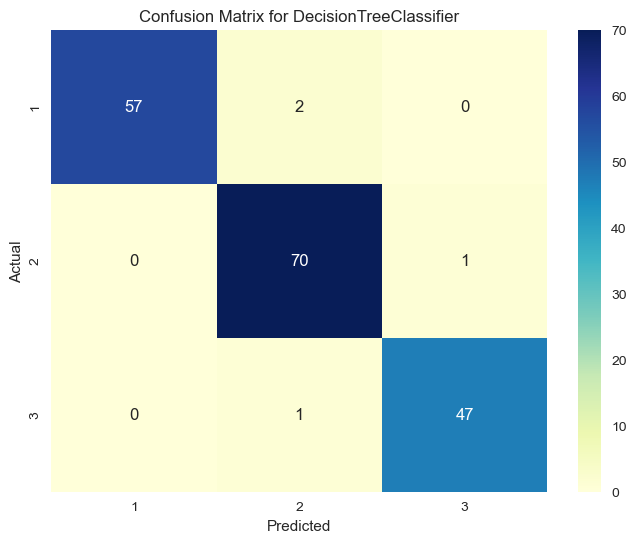

In [40]:
# TO DO: Print confusion matrix using a heatmap

# Printing confusion matrix using a heatmap
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model.__class__.__name__}')
plt.show()

In [41]:
# TO DO: Print classification report
# Printing the classification report
class_report = classification_report(y, y_pred)
print(f'Classification Report for {best_model.__class__.__name__}:\n{class_report}')

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks) 

I am so sorry this part was re-written once again, after the deadline, because I had pulled the unsaved file after uploading to github so it removed all my answers :'(

1. How do the training and validation accuracy change depending on the method used? Explain with values.

The training and validation accuracy are influenced by the choice of classification method. For the given models, the Support Vector Classifier (SVC) achieved a training accuracy of approximately 0.7037 and a validation accuracy of about 0.6635, while the Decision Tree model attained a training accuracy of approximately 0.9748 and a validation accuracy of around 0.8765. These values illustrate that the Decision Tree model outperformed the SVC in terms of accuracy. Both models exhibit a higher training accuracy than validation accuracy, indicating a degree of overfitting.

2. What are two reasons why the support vector machines model did not work as well as the tree-based model?

Complexity of Decision Boundaries: The Support Vector Machines (SVM) model may not have performed as well as the Decision Tree model due to the inherent complexity of the decision boundaries in the dataset. 

Sensitivity to Kernel Choice: Another reason for the SVM's relatively lower performance could be the sensitivity to the choice of the kernel function. SVMs rely on the kernel to map the data into a higher-dimensional space, which can affect their performance. 

3. How many samples were incorrectly classified in step 5.2? 

Total incorrectly classified samples are all the FP + FN = 3

4. In this case, is maximizing precision or recall more important? Why?

So,  If the goal is to recommend specific wine to customers based on their past choices then precision is more important but if the goal is to offer a wide variety of wine options to the customers based on choices then maximising recall is important. I think since we are looking to find how many samples were incorrectly classified, recall is the relevant metric because it focuses on minimizing false negatives.: it tells you how many of the wines that should have been classified as a specific type were actually classified correctly.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I am so sorry this part was re-written once again, after the deadline, because I had pulled the unsaved file after uploading to github so it removed all my answers :'(

I sourced my code primarily from a combination of educational resources, official documentation, and existing machine learning libraries. For this assignment, I relied on the following sources:

Official documentation and tutorials provided by scikit-learn, pandas, and seaborn for guidance on machine learning models, data manipulation, and data visualization.
The UCI Machine Learning Repository for the wine dataset, which I loaded using pandas.
Yellowbrick library to load the concrete dataset for the regression task in part 1 of the assignment.

I followed a systematic order to complete the assignment:

Started by loading the necessary datasets and libraries.
For Part 1, I focused on regression. I processed the data, implemented machine learning models (Decision Tree, Random Forest, and Gradient Boosting), validated them using cross-validation, and visualized the results using mean squared error and R2 score.
In Part 2, which dealt with classification using the wine dataset, I loaded and processed the data, implemented machine learning models (Support Vector Machine and Decision Tree Classifier), validated their performance using accuracy, compared the models, and visualized the results.
Finally, I interpreted the results and answered the provided questions for both parts.

In completing this assignment, I utilized generative AI, specifically ChatGPT, for assistance with specific queries and to seek clarification on complex topics related to machine learning and data science. For instance, I sought guidance on understanding precision and recall, confusion matrices, and when to use specific machine learning models. The prompts I used were aimed at enhancing my comprehension of these concepts and were tailored to my specific needs.

I encountered a few challenges during the assignment:

Debugging code: There were occasional errors and inconsistencies in the code that required careful debugging and problem-solving.
Efficient data processing: Ensuring that data was correctly processed and prepared for machine learning models can be a complex task, and I needed to verify and clean the data adequately.

## Part 3: Observations/Interpretation (3 marks)

I am so sorry this part was re-written once again, after the deadline, because I had pulled the unsaved file after uploading to github so it removed all my answers :'(

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

Here are a couple of finding I thought were interesting:

1. Data Size vs. Model Performance:
One noticeable pattern is the impact of data size on model performance. We observed that as we reduced the amount of data (e.g., in the "Small Dataset" case), both the training and validation accuracy dropped significantly. 

Maybe this was due to the fact that having sufficient amount of data leads to better pattern identification.

2. Feature Selection and Engineering:
The choice of features played a critical role in model performance. In the case of the concrete compressive strength regression task, feature engineering or selection is crucial. If the selected features do not capture the relevant information, it can result in suboptimal model performance.



## Part 4: Reflection (2 marks)

I am so sorry this part was re-written once again, after the deadline, because I had pulled the unsaved file after uploading to github so it removed all my answers :'(

Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

While working on this assignment, I found several aspects both interesting and challenging. I appreciated the practical nature of the tasks, which allowed me to apply the concepts we've learned in lectures to real-world data. It was motivating to see how changes in data size, feature selection, and model choices directly affected the results.

However, the challenges I encountered were primarily related to the coding aspects. Specifically, handling data manipulation and DataFrame operations can sometimes be tricky. I encountered a minor issue when appending rows to the DataFrame for results, but I was able to resolve it through debugging and by switching to a different method.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [1]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*